In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# **Load Dataset**

In [4]:
# Load datasets
googleads_performance = pd.read_csv('/content/googleads-performance.csv')
metaads_performance = pd.read_csv('/content/metaads-performance.csv')
microsoftads_performance = pd.read_csv('/content/microsoftads-performance.csv')
website_landings = pd.read_csv('/content/website-landings.csv')
googleads_performance.columns = googleads_performance.columns.str.capitalize()
metaads_performance.columns = metaads_performance.columns.str.capitalize()
microsoftads_performance.columns = microsoftads_performance.columns.str.capitalize()
website_landings.columns = website_landings.columns.str.capitalize()
# Rename 'Conversion' to 'Conversions'
googleads_performance.rename(columns={'Conversion': 'Conversions'}, inplace=True)
metaads_performance.rename(columns={'Conversion': 'Conversions'}, inplace=True)
microsoftads_performance.rename(columns={'Conversion': 'Conversions'}, inplace=True)


In [5]:
googleads_performance.info()
metaads_performance.info()
microsoftads_performance.info()
website_landings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           714 non-null    object 
 1   Campaign type  714 non-null    object 
 2   Impressions    714 non-null    int64  
 3   Clicks         714 non-null    int64  
 4   Cost           714 non-null    float64
 5   Conversions    714 non-null    float64
 6   Revenue        714 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         182 non-null    object 
 1   Impressions  182 non-null    int64  
 2   Reach        182 non-null    int64  
 3   Cost         182 non-null    float64
 4   Clicks       182 non-null    int64  
 5   Conversions  182 non-null    int64

In [6]:
website_landings['Campaign type'].unique()

array([nan, 'Shopping', 'Search & content', 'Cross-network', 'Audience',
       'Search Network', 'Performance max', 'YouTube', 'Display Network'],
      dtype=object)

In [7]:
website_landings['Channel'].unique()

array(['direct', 'organic search', 'referral', 'email', 'display',
       'social', 'paid', 'paid search'], dtype=object)

In [8]:
googleads_performance['Campaign type'].unique()

array(['Cross-network', 'Display Network', 'Search Network', 'YouTube'],
      dtype=object)

In [9]:
microsoftads_performance['Campaign type'].unique()

array(['Audience', 'Performance max', 'Search & content', 'Shopping'],
      dtype=object)

In [10]:
website_landings['Source'].unique()

array([nan, 'google', 'yahoo!', 'pinterest', 'facebook', 'duckduckgo',
       'youtube', 'bing', 'criteo', 'taboola', 'reddit', 'ecosia',
       'tiktok', 'instagram', 'outbrain', 'outlook.com', 'yahoo! mail',
       'gmail', 'baidu', 'aol', 'hi5', 'infospace', 'twitter', 'aol mail',
       'snapchat', 'qq mail', 'yahoo! images', 'seznam mail', 'earthlink',
       'qwant', 't-online', 'optus zoo', 'google images', 'startsiden',
       'bigpond', 'naver', 'linkedin', 'quora', 'atlas', 'yandex',
       'myheritage', 'tumblr', 'mail.ru', 'skype', 'daum',
       'odnoklassniki', 'google news', 'zoho', 'lilo', 'amazon', 'seznam',
       'kvasir', 'hacker news'], dtype=object)

# **Data Preprocessing**

In [11]:
# Handling Duplicates
googleads_performance.drop_duplicates(inplace=True)
metaads_performance.drop_duplicates(inplace=True)
microsoftads_performance.drop_duplicates(inplace=True)
website_landings.drop_duplicates(inplace=True)

# Imputing missing values
imputer = SimpleImputer(strategy='mean')

# Google Ads
googleads_performance['Campaign type'].fillna('Unknown', inplace=True)
googleads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']] = imputer.fit_transform(
    googleads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

# Meta Ads
metaads_performance[['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue']] = imputer.fit_transform(
    metaads_performance[['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue']])

# Microsoft Ads
microsoftads_performance['Campaign type'].fillna('Unknown', inplace=True)
microsoftads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']] = imputer.fit_transform(
    microsoftads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

# Website Landings
website_landings['Source'].fillna('Unknown', inplace=True)
website_landings['Campaign type'].fillna('Unknown', inplace=True)


In [12]:
# --- Data Preprocessing ---

## Handling Duplicates
googleads_performance.drop_duplicates(inplace=True)
metaads_performance.drop_duplicates(inplace=True)
microsoftads_performance.drop_duplicates(inplace=True)
website_landings.drop_duplicates(inplace=True)

## Handling Null Values
# Imputing missing values
imputer = SimpleImputer(strategy='mean')

# Google Ads
googleads_performance['Campaign type'].fillna('Unknown', inplace=True)
googleads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']] = imputer.fit_transform(
    googleads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

# Meta Ads
metaads_performance[['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue']] = imputer.fit_transform(
    metaads_performance[['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue']])

# Microsoft Ads
microsoftads_performance['Campaign type'].fillna('Unknown', inplace=True)
microsoftads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']] = imputer.fit_transform(
    microsoftads_performance[['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']])

# Website Landings
website_landings['Source'].fillna('Unknown', inplace=True)
website_landings['Campaign type'].fillna('Unknown', inplace=True)

## Correcting Data Formats
# Ensure 'Date' columns are in datetime format
googleads_performance['Date'] = pd.to_datetime(googleads_performance['Date'], errors='coerce')
metaads_performance['Date'] = pd.to_datetime(metaads_performance['Date'], errors='coerce')
microsoftads_performance['Date'] = pd.to_datetime(microsoftads_performance['Date'], errors='coerce')
website_landings['Website landing time'] = pd.to_datetime(website_landings['Website landing time'], errors='coerce')

## Transform 'User id' to hexadecimal string
def transform_user_id(user_id):
    try:
        if isinstance(user_id, float):
            user_id = int(user_id)
        if isinstance(user_id, int):
            return hex(user_id)
        if isinstance(user_id, str):
            if user_id.isdigit():
                return hex(int(user_id))
            return user_id
    except ValueError:
        return user_id

website_landings['User id'] = website_landings['User id'].apply(transform_user_id)

## Handling Incorrect Data Entries
# Replace negative values with 0
def clean_data(df, columns):
    for col in columns:
        df[col] = np.where(df[col] < 0, 0, df[col])

# Apply to each DataFrame
clean_data(googleads_performance, ['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue'])
clean_data(metaads_performance, ['Impressions', 'Reach', 'Cost', 'Clicks', 'Conversions', 'Revenue'])
clean_data(microsoftads_performance, ['Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue'])

# Ensure 'Is converted' column only contains binary values
website_landings['Is converted'] = np.where(website_landings['Is converted'].isin([0, 1]), website_landings['Is converted'], np.nan)
website_landings['Is converted'].fillna(0, inplace=True)


<ipython-input-12-72ee331a42d1>:36: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  website_landings['Website landing time'] = pd.to_datetime(website_landings['Website landing time'], errors='coerce')


In [24]:
# --- Data Preprocessing Continued ---

# Rename columns in website_landings for consistency
website_landings.rename(columns={
    'Website landing time': 'Date',
    'Is converted': 'Conversions',
    'Channel': 'Channel',
    'Campaign type': 'Campaign type'
}, inplace=True)

# Aggregate website landings data by Date, Channel, and Campaign type
website_conversions = website_landings.groupby(['Date', 'Channel', 'Campaign type','Source']).agg({
    'Conversions': 'sum',
    'User id': 'count'  # Assuming User id represents impressions
}).rename(columns={'User id': 'Impressions'}).reset_index()

# Display the first few rows of the aggregated website conversions data
print(website_conversions.head())


                 Date         Channel  Campaign type      Source  Conversions  \
0 2024-01-01 00:01:00          direct        Unknown     Unknown          0.0   
1 2024-01-01 00:01:00            paid  Cross-network      google          0.0   
2 2024-01-01 00:02:00  organic search        Unknown  duckduckgo          0.0   
3 2024-01-01 00:02:00            paid  Cross-network      google          0.0   
4 2024-01-01 00:02:00            paid        Unknown    facebook          0.0   

   Impressions  
0            1  
1            2  
2            1  
3            2  
4            1  


# **Data Preperation for Modelling**

In [27]:
# --- Data Preparation for Modeling ---

## Combine Google, Meta, and Microsoft ads performance data
# Prepare Google Ads data
googleads_data = googleads_performance[['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].copy()

# Prepare Meta Ads data
metaads_data = metaads_performance[['Date', 'Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']].rename(columns={'Impressions': 'Impressions', 'Conversions': 'Conversions'})

# Prepare Microsoft Ads data
microsoftads_data = microsoftads_performance[['Date', 'Campaign type', 'Impressions', 'Clicks', 'Cost', 'Conversions', 'Revenue']]

# Concatenate all datasets
ads_performance = pd.concat([googleads_data, metaads_data, microsoftads_data], ignore_index=True)

# Clean the 'Campaign type' field
ads_performance['Campaign type'].fillna('Unknown', inplace=True)

# Aggregate by Date and Campaign type
ads_performance_grouped = ads_performance.groupby(['Date', 'Campaign type']).sum().reset_index()

# Join with website landings data
website_landings_grouped = website_conversions.groupby(['Date','Channel','Campaign type', 'Source']).agg({  # Include 'Source' in the grouping
    'Conversions': 'sum',
    'Impressions':'count'
}).reset_index()

# Ensure the 'Conversions' column from website_landings_grouped is preserved during the merge
final_data = ads_performance_grouped.merge(website_landings_grouped, on=['Date', 'Campaign type'], how='left', suffixes=('_ads', '_website'))

# Fill missing values after merge
final_data.fillna(0, inplace=True)

# Feature Engineering
final_data['Cost_per_Click'] = final_data['Cost'] / np.where(final_data['Clicks'] == 0, 1, final_data['Clicks'])

# Use the correct column name for Conversions from the website data
final_data['Conversion_Rate'] = final_data['Conversions_website'] / np.where(final_data['Clicks'] == 0, 1, final_data['Clicks'])

# Select features and target
# Update feature names to reflect the suffixes added during the merge
features = ['Impressions_ads', 'Clicks', 'Cost', 'Cost_per_Click', 'Conversion_Rate']
target = 'Revenue'

# Splitting the data
X = final_data[features]
y = final_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training**

In [28]:
# --- Model Training ---

## Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

## Train the model
model.fit(X_train, y_train)

## Predictions
y_pred = model.predict(X_test)

## Model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 1888.3568520968997


# **Budget Allocation(Including Unknown Channel)**

In [54]:
# --- Budget Allocation for Next 30 Days ---

# Calculate the metrics: Cost per Conversion (CPC), ROI, Conversion Rate
final_data['CPC'] = final_data['Cost'] / np.where(final_data['Conversions_website'] == 0, 1, final_data['Conversions_website'])
final_data['ROI'] = final_data['Revenue'] / np.where(final_data['Cost'] == 0, 1, final_data['Cost'])
final_data['Conversion_Rate'] = final_data['Conversions_website'] / np.where(final_data['Clicks'] == 0, 1, final_data['Clicks'])

# Group by Channel, Campaign type, and Source to calculate aggregate metrics
grouped_metrics = final_data.groupby(['Channel', 'Campaign type', 'Source']).agg({
    'Cost': 'sum',
    'Revenue': 'sum',
    'Conversions_website': 'sum',
    'Clicks': 'sum'
}).reset_index()

# Recalculate CPC, ROI, and Conversion Rate for each group
grouped_metrics['CPC'] = grouped_metrics['Cost'] / np.where(grouped_metrics['Conversions_website'] == 0, 1, grouped_metrics['Conversions_website'])
grouped_metrics['ROI'] = grouped_metrics['Revenue'] / np.where(grouped_metrics['Cost'] == 0, 1, grouped_metrics['Cost'])
grouped_metrics['Conversion_Rate'] = grouped_metrics['Conversions_website'] / np.where(grouped_metrics['Clicks'] == 0, 1, grouped_metrics['Clicks'])

# Normalize the metrics to use them in budget allocation
grouped_metrics['Normalized_CPC'] = 1 / grouped_metrics['CPC']  # Inverted as lower CPC is better
grouped_metrics['Normalized_ROI'] = grouped_metrics['ROI'] / grouped_metrics['ROI'].sum()
grouped_metrics['Normalized_Conversion_Rate'] = grouped_metrics['Conversion_Rate'] / grouped_metrics['Conversion_Rate'].sum()

# Normalize all metrics so their sum equals 1
total_normalized = grouped_metrics[['Normalized_CPC', 'Normalized_ROI', 'Normalized_Conversion_Rate']].sum(axis=1)
grouped_metrics['Total_Normalized'] = total_normalized / total_normalized.sum()

# Allocate the budget
total_budget = 200000  # Example total budget in USD
#grouped_metrics['Allocated_Budget'] = grouped_metrics['Total_Normalized'] * total_budget
grouped_metrics['Allocated_Budget'] = grouped_metrics['Total_Normalized'] * total_budget

# Format the Allocated Budget as USD with dollar symbol
grouped_metrics['Allocated_Budget'] = grouped_metrics['Allocated_Budget'].apply(lambda x: f"${x:,.2f}")
# Display the budget allocation
print("Budget Allocation across Channels, Campaign types, and Sources:")
print(grouped_metrics[['Channel', 'Campaign type', 'Source', 'Allocated_Budget']])


Budget Allocation across Channels, Campaign types, and Sources:
           Channel     Campaign type    Source Allocated_Budget
0                0          Audience         0          $695.42
1                0     Cross-network         0        $1,162.04
2                0   Display Network         0        $7,376.73
3                0   Performance max         0          $665.05
4                0  Search & content         0          $760.32
5                0    Search Network         0        $1,762.21
6                0          Shopping         0        $1,716.57
7                0           Unknown         0       $10,504.00
8                0           YouTube         0          $147.54
9           direct           Unknown   Unknown       $96,673.66
10         display           Unknown   Unknown        $7,288.20
11         display           Unknown    criteo        $3,164.65
12           email           Unknown   Unknown        $5,435.06
13  organic search           Unknown    

# **Data Visualization**

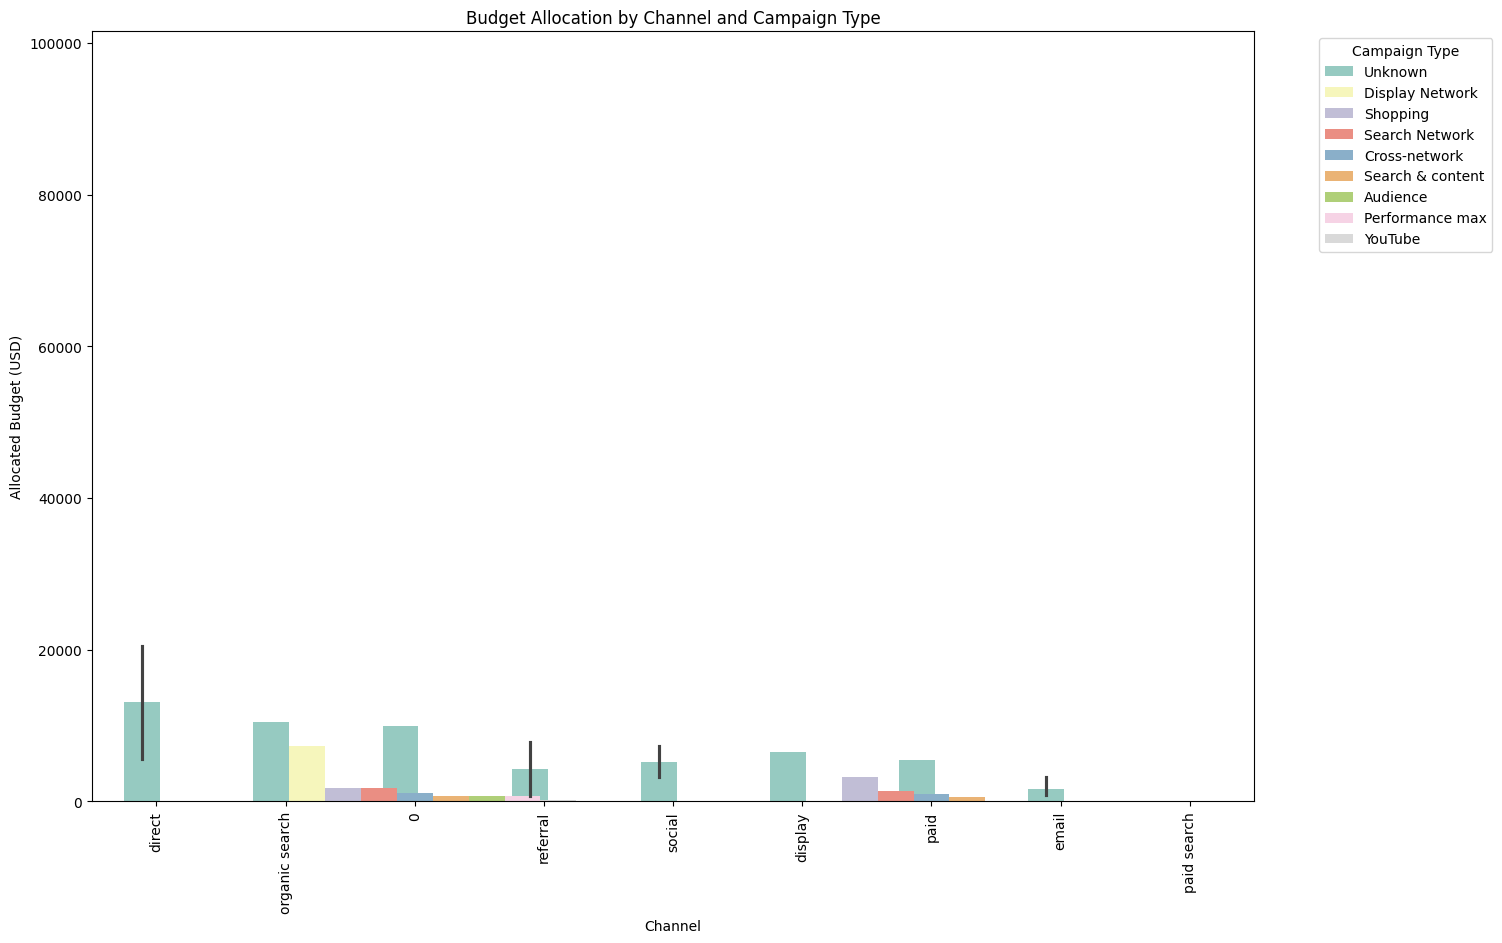

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Allocated_Budget column back to a numeric format for plotting
grouped_metrics['Allocated_Budget_Numeric'] = grouped_metrics['Allocated_Budget'].replace('[\$,]', '', regex=True).astype(float)

# Set the plot size
plt.figure(figsize=(15, 10))

# Create a vertical bar plot
sns.barplot(
    data=grouped_metrics.sort_values('Allocated_Budget_Numeric', ascending=False),
    x='Channel',
    y='Allocated_Budget_Numeric',
    hue='Campaign type',
    palette='Set3',
    width=2.5
)

# Set plot labels and title
plt.xlabel('Channel')
plt.ylabel('Allocated Budget (USD)')
plt.title('Budget Allocation by Channel and Campaign Type')
plt.legend(title='Campaign Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


# **Budget Allocation after filtering unknown datas**

In [53]:
# --- Budget Allocation after Filtering ---

# Filter out rows where 'Campaign type' is 'Unknown' and both 'Source' and 'Channel' are 0
filtered_data = final_data[~((final_data['Campaign type'] == 'Unknown') &
                             (final_data['Source'] == 0) &
                             (final_data['Channel'] == 0))].copy()  # Ensure to use .copy() to avoid the SettingWithCopyWarning

# Recalculate the metrics: Cost per Conversion (CPC), ROI, Conversion Rate
filtered_data.loc[:, 'CPC'] = filtered_data['Cost'] / np.where(filtered_data['Conversions_website'] == 0, 1, filtered_data['Conversions_website'])
filtered_data.loc[:, 'ROI'] = filtered_data['Revenue'] / np.where(filtered_data['Cost'] == 0, 1, filtered_data['Cost'])
filtered_data.loc[:, 'Conversion_Rate'] = filtered_data['Conversions_website'] / np.where(filtered_data['Clicks'] == 0, 1, filtered_data['Clicks'])

# Group by Channel, Campaign type, and Source to calculate aggregate metrics
grouped_filtered_metrics = filtered_data.groupby(['Channel', 'Campaign type', 'Source']).agg({
    'Cost': 'sum',
    'Revenue': 'sum',
    'Conversions_website': 'sum',
    'Clicks': 'sum'
}).reset_index()

# Recalculate CPC, ROI, and Conversion Rate for each group
grouped_filtered_metrics.loc[:, 'CPC'] = grouped_filtered_metrics['Cost'] / np.where(grouped_filtered_metrics['Conversions_website'] == 0, 1, grouped_filtered_metrics['Conversions_website'])
grouped_filtered_metrics.loc[:, 'ROI'] = grouped_filtered_metrics['Revenue'] / np.where(grouped_filtered_metrics['Cost'] == 0, 1, grouped_filtered_metrics['Cost'])
grouped_filtered_metrics.loc[:, 'Conversion_Rate'] = grouped_filtered_metrics['Conversions_website'] / np.where(grouped_filtered_metrics['Clicks'] == 0, 1, grouped_filtered_metrics['Clicks'])

# Normalize the metrics to use them in budget allocation
grouped_filtered_metrics['Normalized_CPC'] = 1 / grouped_filtered_metrics['CPC']  # Inverted as lower CPC is better
grouped_filtered_metrics['Normalized_ROI'] = grouped_filtered_metrics['ROI'] / grouped_filtered_metrics['ROI'].sum()
grouped_filtered_metrics['Normalized_Conversion_Rate'] = grouped_filtered_metrics['Conversion_Rate'] / grouped_filtered_metrics['Conversion_Rate'].sum()

# Normalize all metrics so their sum equals 1
total_normalized_filtered = grouped_filtered_metrics[['Normalized_CPC', 'Normalized_ROI', 'Normalized_Conversion_Rate']].sum(axis=1)
grouped_filtered_metrics['Total_Normalized'] = total_normalized_filtered / total_normalized_filtered.sum()

# Allocate the budget
total_budget = 200000  # Example total budget in USD
grouped_filtered_metrics['Allocated_Budget'] = grouped_filtered_metrics['Total_Normalized'] * total_budget

# Format the Allocated Budget as USD with dollar symbol
grouped_filtered_metrics['Allocated_Budget'] = grouped_filtered_metrics['Allocated_Budget'].apply(lambda x: f"${x:,.2f}")

# Display the budget allocation
print("Budget Allocation across Channels, Campaign types, and Sources after filtering:")
print(grouped_filtered_metrics[['Channel', 'Campaign type', 'Source', 'Allocated_Budget']])


Budget Allocation across Channels, Campaign types, and Sources after filtering:
           Channel     Campaign type    Source Allocated_Budget
0                0          Audience         0          $777.34
1                0     Cross-network         0        $1,309.85
2                0   Display Network         0        $7,377.42
3                0   Performance max         0          $746.49
4                0  Search & content         0          $856.85
5                0    Search Network         0        $1,986.34
6                0          Shopping         0        $1,934.10
7                0           YouTube         0          $164.42
8           direct           Unknown   Unknown       $97,132.19
9          display           Unknown   Unknown        $8,201.97
10         display           Unknown    criteo        $3,529.77
11           email           Unknown   Unknown        $6,113.79
12  organic search           Unknown      bing       $22,973.41
13  organic search      

# **Visualization**

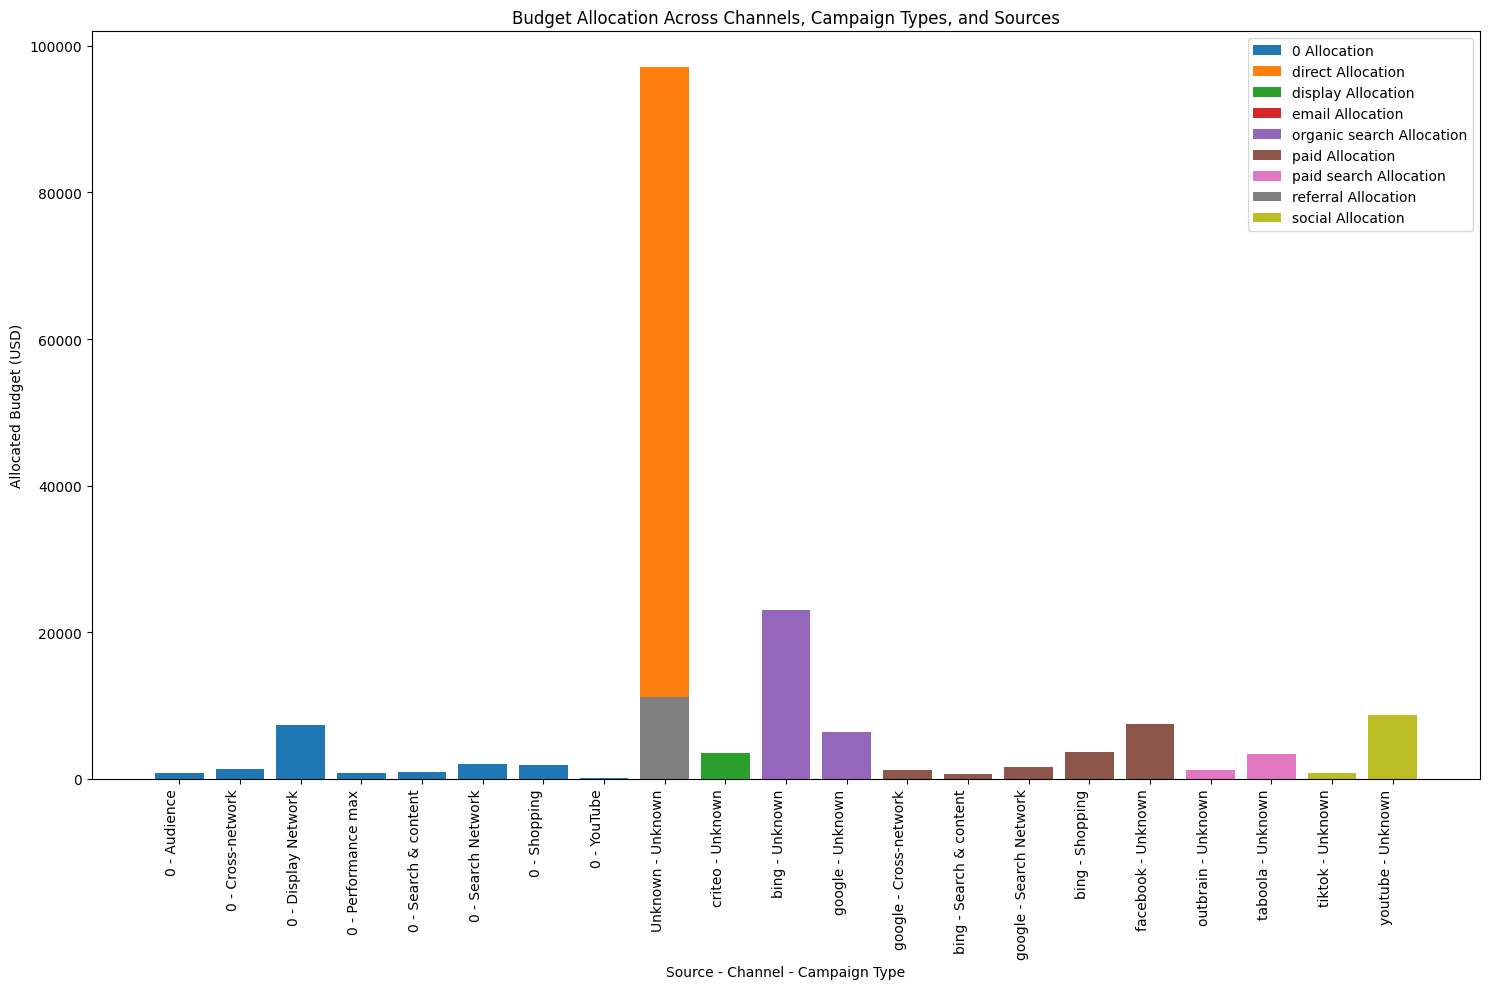

In [51]:
import matplotlib.pyplot as plt

# Visualization for Budget Allocation
def plot_budget_allocation(df):
    # Set up the figure and axis
    plt.figure(figsize=(15, 10))

    # Plot a bar chart
    for channel in df['Channel'].unique():
        channel_data = df[df['Channel'] == channel]
        # Convert 'Source' and 'Campaign type' to strings before concatenation
        plt.bar(channel_data['Source'].astype(str) + ' - ' + channel_data['Campaign type'].astype(str),
                channel_data['Allocated_Budget'].replace({'\$': '', ',': ''}, regex=True).astype(float),
                label=f'{channel} Allocation')

    # Add labels and title
    plt.xlabel('Source - Channel - Campaign Type')
    plt.ylabel('Allocated Budget (USD)')
    plt.title('Budget Allocation Across Channels, Campaign Types, and Sources')
    plt.xticks(rotation=90, ha='right')
    plt.legend(loc='upper right')
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the plotting function
plot_budget_allocation(grouped_filtered_metrics)